# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 5
<p>Técnicas y métricas de evaluación de modelos de Machine Learning.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame
# import numpy as np
import matplotlib.pyplot as plt

# Seleccion de caracteristicas
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.model_selection import train_test_split

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Climate Model Simulation Crashes*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Realiza un conteo de las clases y analiza si hay desequilibrio.
- Evalua el rendimiento del modelo k-Nearest Neigbours mediante las tres estrategias de validación cruzada estudiados y utilizando la métrica que consideres más adecuada.

***Fuente:*** *https://archive-beta.ics.uci.edu/ml/datasets/climate+model+simulation+crashes*

In [2]:
# Carga del dataset
# sep='\s+' -> Separador de datos por diferente longitud de espacios en blanco
df=read_csv('pop_failures.dat', sep="\s+", engine='python')

# Representación de los datos
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


<div style="font-size:14px; text-align:justify"><b>1: </b>Realiza un conteo de las clases y analiza si hay desequilibrio.</div>

Para el análisis de la distribución de los datos, basta con la agrupación de las instancias en base a la característica a la que pertenecen y más adelante valorar el posible desbalanceo o no.

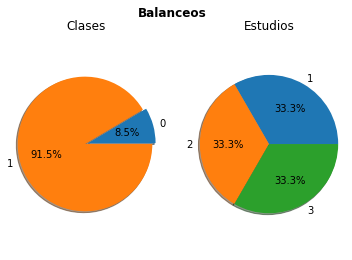

In [75]:
# Agrupación de la columna deseada
outcome_distribution=df.groupby('outcome').size()
study_distribution=df.groupby('Study').size()

# Ploteo de los datos
labels = [df['outcome'].unique(), df['Study'].unique()]
sizes = [outcome_distribution, study_distribution]
explode = (0, 0.05)

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].pie(sizes[0], explode=explode, labels=labels[0], autopct='%1.1f%%', shadow=True)
axes[1].pie(sizes[1], labels=labels[1], autopct='%1.1f%%', shadow=True)

axes[0].axis('equal')
axes[1].axis('equal')

axes[0].set_title('Clases')
axes[1].set_title('Estudios')
fig.suptitle('Balanceos', fontweight='bold')

plt.show()

Para el caso de estudio, se trata de un dataset desbalanceado, ya que el 92% de las instancias hacen referencia a la clase "1".<br>
Por otro lado, dado que existe determinadas clases de estudios, se realiza el balanceo de los mismos, y para este caso, observamos que están completamente balanceados ya que existe 3 tipos de estudios y existe 1/3 de instancias para cada tipo de estudio.

<div style="font-size:14px; text-align:justify"><b>2: </b>Evalua el rendimiento del modelo k-Nearest Neigbours mediante las tres estrategias de validación cruzada estudiados y utilizando la métrica que consideres más adecuada.</div>